In [1]:
from pandas import read_csv
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import GridSearchCV 
import matplotlib.pyplot as plt

In [2]:
file="H:/Sampada/Assignments/KNN/glass.csv"
glass=read_csv(file)
glass

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [3]:
glass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [5]:
glass[glass.duplicated()].shape

(1, 10)

In [6]:
glass_norepeated=glass.drop_duplicates()

In [8]:
glass_norepeated.shape

(213, 10)

In [12]:
glass_norepeated.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [42]:
array=glass_norepeated.values
X=array[:,0:9]
Y=array[:,9]
#Chi-squared stats of non-negative features for classification tasks.
#k= Number of top features to select
test=SelectKBest(score_func=chi2,k=5)
fit=test.fit(X,Y)
#Number of digits of precision for floating point output (default 8). May be None if floatmode is not fixed, to print as many 
#digits as necessary to uniquely specify the value.
set_printoptions(precision=2)
print(fit.scores_)

[4.66e-05 4.34e+00 1.01e+02 1.66e+01 1.10e-01 3.15e+01 3.24e+00 1.45e+02
 2.16e+00]


In [43]:
#0.0000466 4.34 101 16.6 0.110 31.5 3.24 145 2.16
#glass_dropped=glass_norepeated.iloc[:,[2,7,9]]
#array=glass_dropped.values
#X=array[:,0:2]
#Y=array[:,2]

In [86]:
kfold=KFold(n_splits=22)
model=KNeighborsClassifier(n_neighbors=1)
result=cross_val_score(model,X,Y,cv=kfold)
print(result.mean())
model

0.6156565656565657


KNeighborsClassifier(n_neighbors=1)

In [45]:
neighbors=np.array(range(1,40))
paramgrid=dict(n_neighbors=neighbors)
model=KNeighborsClassifier()
grid=GridSearchCV(estimator=model,param_grid=paramgrid)
grid.fit(X,Y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])})

In [46]:
print(grid.best_score_)
print(grid.best_params_)

0.64828349944629
{'n_neighbors': 1}


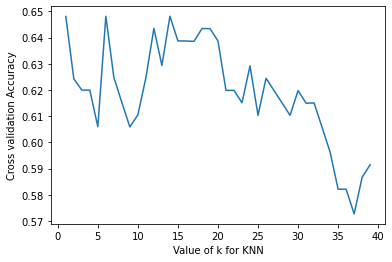

In [54]:
k_range=range(1,40)
k_score=[]
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(knn,X,Y,cv=4)
    k_score.append(scores.mean())
    
plt.plot(k_range,k_score)
plt.xlabel("Value of k for KNN")
plt.ylabel("Cross validation Accuracy")
plt.show()